In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
import statsmodels.api as sm
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier,VotingClassifier
# from lightgbm import LGBMClassifier

In [2]:
# reading data
credit = pd.read_csv('credit_card.csv')

credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# converting column names in lower case

credit.columns = map(str.lower, credit.columns)
credit.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [4]:
df = credit.copy()

df.head(2)

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [5]:
# droping id col(irrelevant)

df.drop('id',axis=1,inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
pay_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [7]:
## Checking Null Values

for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,' has null values.' )
    else:
        print(i,'has no null values.')

limit_bal has no null values.
sex has no null values.
education has no null values.
marriage has no null values.
age has no null values.
pay_1 has no null values.
pay_2 has no null values.
pay_3 has no null values.
pay_4 has no null values.
pay_5 has no null values.
pay_6 has no null values.
bill_amt1 has no null values.
bill_amt2 has no null values.
bill_amt3 has no null values.
bill_amt4 has no null values.
bill_amt5 has no null values.
bill_amt6 has no null values.
pay_amt1 has no null values.
pay_amt2 has no null values.
pay_amt3 has no null values.
pay_amt4 has no null values.
pay_amt5 has no null values.
pay_amt6 has no null values.
default has no null values.


0    77.88
1    22.12
Name: default, dtype: float64


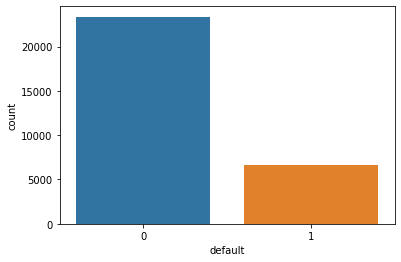

In [8]:
# Checking Imbalance in the Target Column

print(df['default'].value_counts(normalize=True)*100)
sns.countplot(x='default',data=df)
plt.show()

**Non-defaulters are 77.88% and Defaulters are 22.12% of the whole data.**

In [9]:
# as we can see there are values in these columns whose decription is not provided

print(df.marriage.value_counts())
print(df.sex.value_counts())
print(df.education.value_counts())

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64
2    18112
1    11888
Name: sex, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64


In [10]:
# replacing not specified values in others category

df['education']  = df['education'].apply(lambda x:x if (x>0 and x<4) else 4)
df['marriage'] = df['marriage'].apply(lambda x:x if (x>0 and x<3) else 3)

In [11]:
print(df.marriage.value_counts())
print(df.sex.value_counts())
print(df.education.value_counts())

2    15964
1    13659
3      377
Name: marriage, dtype: int64
2    18112
1    11888
Name: sex, dtype: int64
2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64


In [12]:
# before applying get dummies replacing encoded value by string value for better understanding

df['sex'].replace({2:'female',1:'male'},inplace=True)
df['education'].replace({1:'grad_school',2:'university',3:'high_school',4:'others'},inplace=True)
df['marriage'].replace({1:'married',2:'single',3:'others'},inplace=True)

In [13]:
print(df.marriage.value_counts())
print(df.sex.value_counts())
print(df.education.value_counts())

single     15964
married    13659
others       377
Name: marriage, dtype: int64
female    18112
male      11888
Name: sex, dtype: int64
university     14030
grad_school    10585
high_school     4917
others           468
Name: education, dtype: int64


# Exploratory Data Analysis

**1. SEX Column**

female    60.373333
male      39.626667
Name: sex, dtype: float64


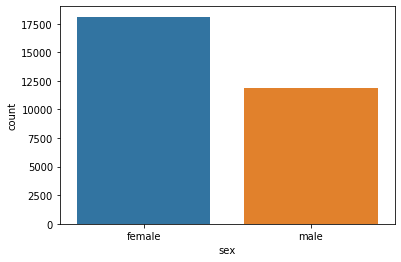

In [14]:
print(df['sex'].value_counts(normalize=True)*100) # proportion of sex who are default
sns.countplot(x='sex',data=df)

plt.show()

female    56.705847
male      43.294153
Name: sex, dtype: float64


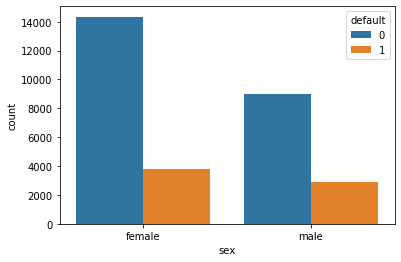

In [15]:
print(df[df['default']==1]['sex'].value_counts(normalize=True)*100) 

sns.countplot(x='sex', hue = 'default',data=df)

plt.show()

**2. EDUCATION Column**

university     46.766667
grad_school    35.283333
high_school    16.390000
others          1.560000
Name: education, dtype: float64


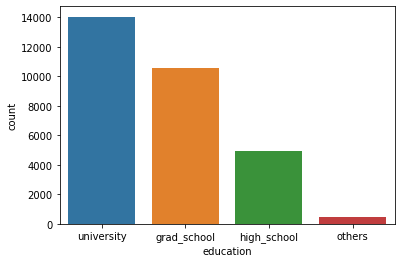

In [16]:
print(df['education'].value_counts(normalize=True)*100)

sns.countplot(x='education',data=df)

plt.show()

university     50.180832
grad_school    30.681133
high_school    18.640747
others          0.497288
Name: education, dtype: float64


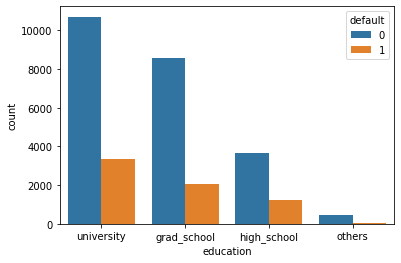

In [17]:
print(df[df['default']==1]['education'].value_counts(normalize=True)*100)

sns.countplot(x='education', hue = 'default',data=df)

plt.show()

**3. AGE Column**

Mean age of the sample:  35.4855
Median age of the sample:  34.0
Mode of the sample:  29


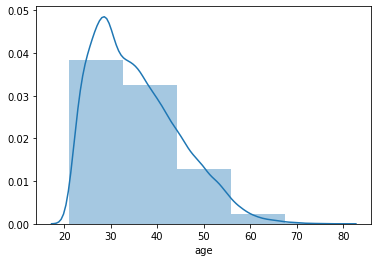

In [18]:
print('Mean age of the sample: ',df['age'].mean())
print('Median age of the sample: ',df['age'].median())
print('Mode of the sample: ',df['age'].mode()[0])

sns.distplot(df['age'],bins=5)
plt.show()

**4. MARRIAGE Column**

single     53.213333
married    45.530000
others      1.256667
Name: marriage, dtype: float64


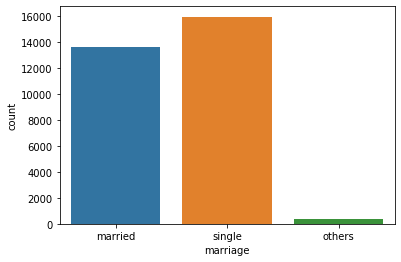

In [19]:
print(df['marriage'].value_counts(normalize=True)*100)

sns.countplot(x='marriage',data=df)

plt.show()

single     50.346594
married    48.312236
others      1.341169
Name: marriage, dtype: float64


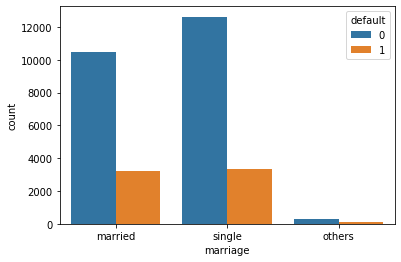

In [20]:
print(df[df['default']==1]['marriage'].value_counts(normalize=True)*100)

sns.countplot(x='marriage', hue = 'default',data=df)

plt.show()

**4. REPAYMENT STATUS Columns**

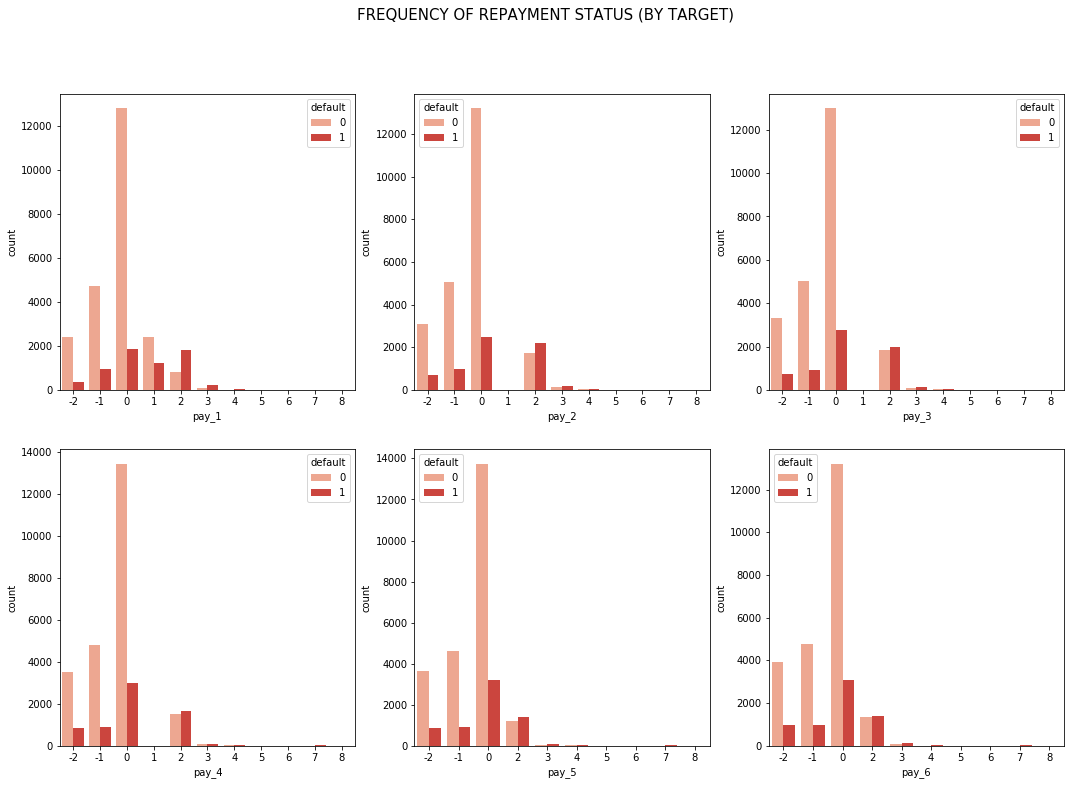

In [21]:
f, axes = plt.subplots(2, 3, figsize=(18,12), facecolor='white')
f.suptitle("FREQUENCY OF REPAYMENT STATUS (BY TARGET)",size=15)
ax1 = sns.countplot(x='pay_1', hue = 'default', data=df, palette='Reds', ax=axes[0,0])
ax2 = sns.countplot(x='pay_2', hue = 'default', data=df, palette='Reds', ax=axes[0,1])
ax3 = sns.countplot(x='pay_3', hue = 'default', data=df, palette='Reds', ax=axes[0,2])
ax4 = sns.countplot(x='pay_4', hue = 'default', data=df, palette='Reds', ax=axes[1,0])
ax5 = sns.countplot(x='pay_5', hue = 'default', data=df, palette='Reds', ax=axes[1,1])
ax6 = sns.countplot(x='pay_6', hue = 'default', data=df, palette='Reds', ax=axes[1,2])
plt.show()

**5. Checking correlation between Bill_Amt**

           bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  bill_amt6
bill_amt1   1.000000   0.951484   0.892279   0.860272   0.829779   0.802650
bill_amt2   0.951484   1.000000   0.928326   0.892482   0.859778   0.831594
bill_amt3   0.892279   0.928326   1.000000   0.923969   0.883910   0.853320
bill_amt4   0.860272   0.892482   0.923969   1.000000   0.940134   0.900941
bill_amt5   0.829779   0.859778   0.883910   0.940134   1.000000   0.946197
bill_amt6   0.802650   0.831594   0.853320   0.900941   0.946197   1.000000


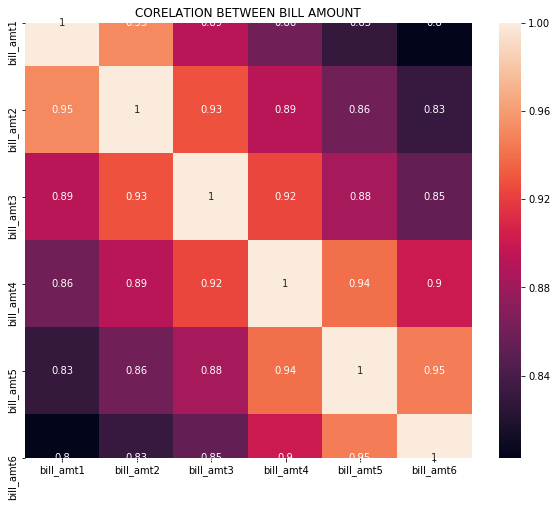

In [22]:
corr_bill_amt = df[['bill_amt1', 'bill_amt2','bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']].corr()
print(corr_bill_amt)
plt.figure(figsize=(10,8))
sns.heatmap(corr_bill_amt,annot=True)
plt.title('CORELATION BETWEEN BILL AMOUNT')
plt.show()

**6. Checking correlation between Pay_Amt**

          pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6
pay_amt1  1.000000  0.285576  0.252191  0.199558  0.148459  0.185735
pay_amt2  0.285576  1.000000  0.244770  0.180107  0.180908  0.157634
pay_amt3  0.252191  0.244770  1.000000  0.216325  0.159214  0.162740
pay_amt4  0.199558  0.180107  0.216325  1.000000  0.151830  0.157834
pay_amt5  0.148459  0.180908  0.159214  0.151830  1.000000  0.154896
pay_amt6  0.185735  0.157634  0.162740  0.157834  0.154896  1.000000


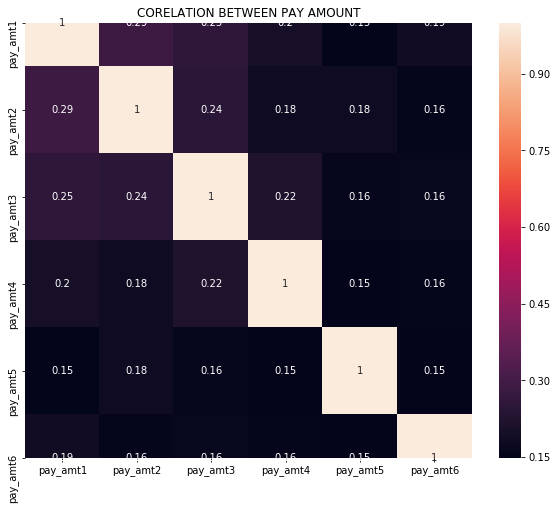

In [23]:
corr_pay_amt = df[['pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].corr()
print(corr_pay_amt)

plt.figure(figsize=(10,8))
sns.heatmap(corr_pay_amt,annot=True)
plt.title('CORELATION BETWEEN PAY AMOUNT')
plt.show()

**7. Checking correlation between Pay (Repayment Status)**

          pay_1     pay_2     pay_3     pay_4     pay_5     pay_6
pay_1  1.000000  0.672164  0.574245  0.538841  0.509426  0.474553
pay_2  0.672164  1.000000  0.766552  0.662067  0.622780  0.575501
pay_3  0.574245  0.766552  1.000000  0.777359  0.686775  0.632684
pay_4  0.538841  0.662067  0.777359  1.000000  0.819835  0.716449
pay_5  0.509426  0.622780  0.686775  0.819835  1.000000  0.816900
pay_6  0.474553  0.575501  0.632684  0.716449  0.816900  1.000000


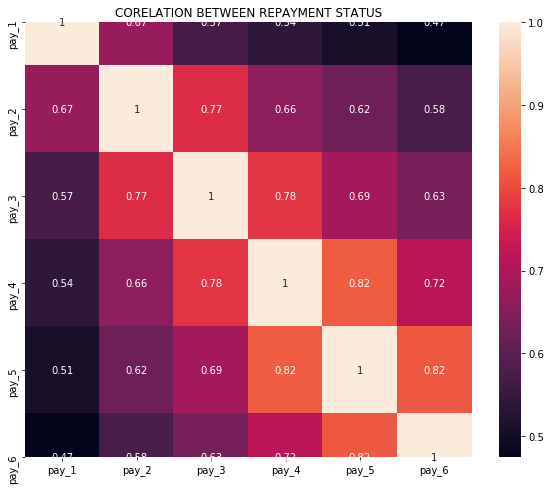

In [24]:
corr_bill_amt = df[['pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].corr()
print(corr_bill_amt)

plt.figure(figsize=(10,8))
sns.heatmap(corr_bill_amt,annot=True)
plt.title('CORELATION BETWEEN REPAYMENT STATUS')
plt.show()

In [35]:
# apply get dummies on sex, marriage and education columns

df = pd.get_dummies(df,columns=['sex',"marriage","education"],drop_first=True)

In [36]:
np.random.seed(42)

In [37]:
X = df.drop('default',axis=1)
y = df.default
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [40]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Base Models

As we know it is a classification problem to predict target which is of binary class. So, we can use following models:
1. Logistic Regression
2. KNN
3. Naive Bayes
4. Decision Tree

In [29]:
# Keeping all models in one list

models=[]
models.append(('Logistic Regression',LogisticRegression(random_state=42)))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('Decision Tree',DecisionTreeClassifier(random_state=42)))

In [33]:
for i,j in models:
    print(i)

Logistic Regression
KNN
Naive Bayes
Decision Tree


In [23]:
# Evaluating Each model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
score = []
bias_error = []
var_error = []
for name,model in models:
    fold=KFold(shuffle=True,n_splits=5,random_state=1)
    if name == 'Logistic Regression'or name == 'KNN' or name == 'Naive Bayes':
        result=cross_val_score(model,X_train_scaled,y_train,cv=fold,scoring='roc_auc')
    else:
        result=cross_val_score(model,X_train,y_train,cv=fold,scoring='roc_auc')
    predictions.append(result)
    names.append(name)
    score.append(result.mean())
    bias_error.append(1-result.mean())
    var_error.append(np.std(result,ddof=1)**2)

In [24]:
acc_df = pd.DataFrame({'AUC Score':score,'Bias Error':bias_error,'Variance Error':var_error},index=names)

acc_df

,AUC Score,Bias Error,Variance Error
Logistic Regression,0.726386,0.273614,0.000050
KNN,0.700813,0.299187,0.000057
Naive Bayes,0.733939,0.266061,0.000093
Decision Tree,0.608352,0.391648,0.000079


# Ensemble Techniques

After checking the score on base models. Now try some more complex models on which there is less effect of multicollinearity on them:-
1. Random Forest Classifier
2. Gradient Boost Classifier
3. Ada Boost Classifier
4. Bagging Classifier

In [26]:
models=[]

models.append(('Random Forest',RandomForestClassifier(random_state=42)))
models.append(('Gradient Boost',GradientBoostingClassifier(random_state=42)))
models.append(('Ada Boost',AdaBoostClassifier(random_state=42)))
models.append(('Bagging Classifier',BaggingClassifier(random_state=42)))

In [27]:
# Evaluating Each model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
score = []
bias_error = []
var_error = []
for name,model in models:
    fold=KFold(shuffle=True,n_splits=5,random_state=1)
    if name == 'Gradient Boost':
        result=cross_val_score(model,X_train_scaled,y_train,cv=fold,scoring='roc_auc')
    else:
        result=cross_val_score(model,X_train,y_train,cv=fold,scoring='roc_auc')
    predictions.append(result)
    names.append(name)
    score.append(result.mean())
    bias_error.append(1-result.mean())
    var_error.append(np.std(result,ddof=1)**2)

In [28]:
acc_df = pd.DataFrame({'AUC Score':score,'Bias Error':bias_error,'Variance Error':var_error},index=names)

acc_df

,AUC Score,Bias Error,Variance Error
Random Forest,0.766185,0.233815,0.000134
Gradient Boost,0.781375,0.218625,0.000112
Ada Boost,0.772375,0.227625,0.000083
Bagging Classifier,0.731135,0.268865,0.000018


By comparing base models and the ensemble ones, we can see that gradient boost is out performing the others
But we will select Logistic Regression, Random Forest, Gradient Boost, Ada Boost for further Hypertuning.

# Hyperparameter Tuning

# Logistic Regression

In [65]:
fold=KFold(shuffle=True,n_splits=5,random_state=42)

In [58]:
lr = LogisticRegression(random_state=42,solver='liblinear',class_weight='balanced')

lr_params = {'penalty':['l1','l2'],'C':[1.0,0.1,0.01,0.001,0.0001]}

In [59]:
gs_lr = GridSearchCV(lr,lr_params,cv=fold,scoring='roc_auc')

gs_lr.fit(X_train_scaled,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [60]:
print('AUC Score:',gs_lr.best_score_)
print('Best Parameters:',gs_lr.best_params_)

AUC Score: 0.7268110151664051
Best Parameters: {'C': 0.1, 'penalty': 'l1'}


# Random Forest

In [62]:
rf = RandomForestClassifier(random_state=42,class_weight='balanced')

rf_params = {'n_estimators': sp_randint(30,150),
    'max_depth': sp_randint(2,10),
    'min_samples_leaf': sp_randint(1,20),
    'min_samples_split': sp_randint(2,20),
    'max_features': sp_randint(2,24),
    'criterion': ['gini','entropy']}

In [63]:
rs_rf = RandomizedSearchCV(rf, rf_params, cv=fold, random_state=42,scoring='roc_auc')

rs_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                         

In [64]:
print('AUC Score:',rs_rf.best_score_)
print('Best Parameters:',rs_rf.best_params_)

AUC Score: 0.7797443772866114
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 13, 'min_samples_leaf': 17, 'min_samples_split': 11, 'n_estimators': 121}


# Gradient Boost Classifier

In [66]:
gb = GradientBoostingClassifier(random_state=42)
gb_param = {'n_estimators':np.arange(50,150)}

In [68]:
gs_gb = GridSearchCV(gb,gb_param,cv=fold,scoring='roc_auc')
gs_gb.fit(X_train_scaled,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_f...
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93, 

In [69]:
print('AUC Score:',gs_gb.best_score_)
print('Best Parameters:',gs_gb.best_params_)

AUC Score: 0.7818267048309879
Best Parameters: {'n_estimators': 90}


# Ada Boost Classifier

In [70]:
boost = AdaBoostClassifier(random_state=42)
boost_param = {'n_estimators':np.arange(10,100)}

In [71]:
gs_boost = GridSearchCV(boost,boost_param,cv=fold, scoring='roc_auc')
gs_boost.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [72]:
print('AUC Score:',gs_boost.best_score_)
print('Best Parameters:',gs_boost.best_params_)

AUC Score: 0.7744990341421879
Best Parameters: {'n_estimators': 43}


# Comparing Results After Hyperparameter Tuning

In [30]:
models=[]
models.append(('Logistic Regression',LogisticRegression(C=1.0,penalty='l1',class_weight='balanced',
                                                       solver='liblinear',random_state=42)))

models.append(('Random Forest',RandomForestClassifier(criterion='entropy', max_depth= 7,max_features=13, min_samples_leaf= 17,
                                                      min_samples_split=11, n_estimators=121, random_state=42,
                                                      class_weight='balanced')))

models.append(('Gradient Boost',GradientBoostingClassifier(n_estimators=90,random_state=42)))

models.append(('Ada Boost',AdaBoostClassifier(n_estimators=43,random_state=42)))

In [31]:
# Evaluating Each model

names=[]
predictions=[]
score = []
bias_error = []
var_error = []
for name,model in models:
    fold=KFold(shuffle=True,n_splits=5,random_state=1)
    if name == 'Gradient Boost' or 'Logistic Regression':
        result=cross_val_score(model,X_train_scaled,y_train,cv=fold,scoring='roc_auc')
    else:
        result=cross_val_score(model,X_train,y_train,cv=fold,scoring='roc_auc')
    predictions.append(result)
    names.append(name)
    score.append(result.mean())
    bias_error.append(1-result.mean())
    var_error.append(np.std(result,ddof=1)**2)

In [32]:
acc_df = pd.DataFrame({'AUC Score':score,'Bias Error':bias_error,'Variance Error':var_error},index=names)

acc_df

,AUC Score,Bias Error,Variance Error
Logistic Regression,0.726796,0.273204,0.000051
Random Forest,0.779453,0.220547,0.000129
Gradient Boost,0.781135,0.218865,0.000118
Ada Boost,0.771858,0.228142,0.000081


As we can see that our AUC Score is not increasing even after hypertuning. So we analysed our data what exactly is the reason behind it. And we found out that there are some anomalies in our data set such as if your repayment status is negative which means you are either not using your credit card or you are duly paying your minimum amount for that month.
So in this case that is not considered as defaulter. But in our dataset there are some customers which are mentioned as defaulters even though they are fulfilling the above criteria. So we have decided to drop such rows and check whether our model auc score improves or not.

In [43]:
# Checking the shape of old dataframe
df.shape

(30000, 27)

In [44]:
df2 = df.copy()

In [45]:
# dropping irrelevant rows on the basis of reason mentioned above.

df2.drop(df2[(df2['pay_1']<0) & (df2['default']==1)].index,axis=0,inplace=True)

In [46]:
df2.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt4,pay_amt5,pay_amt6,default,sex_male,marriage_others,marriage_single,education_high_school,education_others,education_university
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,0,0,0,1,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,0,0,0,0,0,0,1
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,0,0,1
5,50000,37,0,0,0,0,0,0,64400,57069,...,1000,1000,800,0,1,0,1,0,0,0


In [47]:
# after dropping irrelevant we are left with this shape so 1319 rows got deleted.

df2.shape

(28681, 27)

In [26]:
X = df2.drop('default',axis=1)
y = df2.default

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [42]:
models=[]
models.append(('Logistic Regression',LogisticRegression(random_state=42)))

models.append(('Random Forest',RandomForestClassifier(random_state=42)))

models.append(('Gradient Boost',GradientBoostingClassifier(random_state=42)))

models.append(('Ada Boost',AdaBoostClassifier(random_state=42)))

In [43]:
# Evaluating Each model


names=[]
predictions=[]
score = []
bias_error = []
var_error = []
for name,model in models:
    fold=KFold(shuffle=True,n_splits=5,random_state=1)
    if name == 'Gradient Boost' or 'Logistic Regression':
        result=cross_val_score(model,X_train_scaled,y_train,cv=fold,scoring='roc_auc')
    else:
        result=cross_val_score(model,X_train,y_train,cv=fold,scoring='roc_auc')
    predictions.append(result)
    names.append(name)
    score.append(result.mean())
    bias_error.append(1-result.mean())
    var_error.append(np.std(result,ddof=1)**2)

In [44]:
acc_df = pd.DataFrame({'AUC Score':score,'Bias Error':bias_error,'Variance Error':var_error},index=names)

acc_df

,AUC Score,Bias Error,Variance Error
Logistic Regression,0.851458,0.148542,0.000019
Random Forest,0.841119,0.158881,0.000066
Gradient Boost,0.860193,0.139807,0.000051
Ada Boost,0.854790,0.145210,0.000028


From the above dataframe, we can see that after dropping irrelavant rows there is a significant increase in AUC Score.
So, it was a good decision to make. Now we do hypertuning of these models.

# Hyperparameter Tuning

# Logistic Regression


In [46]:
fold=KFold(shuffle=True,n_splits=5,random_state=42)

lr = LogisticRegression(random_state=42,solver='liblinear',class_weight='balanced')

lr_params = {'penalty':['l1','l2'],'C':[1.0,0.1,0.01,0.001,0.0001]}

In [47]:
gs_lr = GridSearchCV(lr,lr_params,cv=fold,scoring='roc_auc')

gs_lr.fit(X_train_scaled,y_train)

print('AUC Score:',gs_lr.best_score_)
print('Best Parameters:',gs_lr.best_params_)

AUC Score: 0.8528555567644374
Best Parameters: {'C': 0.01, 'penalty': 'l1'}


# Random Forest

In [48]:
rf = RandomForestClassifier(random_state=42,class_weight='balanced')

rf_params = {'n_estimators': sp_randint(30,150),'max_depth': sp_randint(2,10),'min_samples_leaf': sp_randint(1,20),
            'min_samples_split': sp_randint(2,20), 'max_features': sp_randint(2,24),'criterion': ['gini','entropy']}

In [49]:
rs_rf = RandomizedSearchCV(rf, rf_params, cv=fold, random_state=42,scoring='roc_auc')
rs_rf.fit(X_train,y_train)

print('AUC Score:',rs_rf.best_score_)
print('Best Parameters:',rs_rf.best_params_)

AUC Score: 0.8588185111645948
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 13, 'min_samples_leaf': 17, 'min_samples_split': 11, 'n_estimators': 121}


# Gradient Boost Classifier

In [50]:
gb = GradientBoostingClassifier(random_state=42)
gb_param = {'n_estimators':np.arange(50,150)}

In [51]:
gs_gb = GridSearchCV(gb,gb_param,cv=fold,scoring='roc_auc')
gs_gb.fit(X_train_scaled,y_train)

print('AUC Score:',gs_gb.best_score_)
print('Best Parameters:',gs_gb.best_params_)

AUC Score: 0.8599703336457752
Best Parameters: {'n_estimators': 73}


# Ada Boost Classifier


In [52]:
boost = AdaBoostClassifier(random_state=42)
boost_param = {'n_estimators':np.arange(10,100)}

In [53]:
gs_boost = GridSearchCV(boost,boost_param,cv=fold, scoring='roc_auc')
gs_boost.fit(X_train,y_train)

print('AUC Score:',gs_boost.best_score_)
print('Best Parameters:',gs_boost.best_params_)

AUC Score: 0.8552206285223601
Best Parameters: {'n_estimators': 40}


In [54]:
# Keeping all models in a list

models=[]
models.append(('Logistic Regression',LogisticRegression(C=0.01,penalty='l1',class_weight='balanced',
                                                       solver='liblinear',random_state=42)))

models.append(('Random Forest',RandomForestClassifier(criterion='entropy', max_depth= 7,max_features=13, min_samples_leaf= 17,
                                                      min_samples_split=11, n_estimators=121, random_state=42,
                                                      class_weight='balanced')))

models.append(('Gradient Boost',GradientBoostingClassifier(n_estimators=73,random_state=42)))

models.append(('Ada Boost',AdaBoostClassifier(n_estimators=40,random_state=42)))

In [55]:
# Evaluating Each model

names=[]
predictions=[]
score = []
bias_error = []
var_error = []
for name,model in models:
    fold=KFold(shuffle=True,n_splits=5,random_state=1)
    if name == 'Gradient Boost' or 'Logistic Regression':
        result=cross_val_score(model,X_train_scaled,y_train,cv=fold,scoring='roc_auc')
    else:
        result=cross_val_score(model,X_train,y_train,cv=fold,scoring='roc_auc')
    predictions.append(result)
    names.append(name)
    score.append(result.mean())
    bias_error.append(1-result.mean())
    var_error.append(np.std(result,ddof=1)**2)

In [56]:
acc_df = pd.DataFrame({'AUC Score':score,'Bias Error':bias_error,'Variance Error':var_error},index=names)

acc_df

,AUC Score,Bias Error,Variance Error
Logistic Regression,0.853713,0.146287,0.000023
Random Forest,0.858531,0.141469,0.000066
Gradient Boost,0.860287,0.139713,0.000051
Ada Boost,0.855090,0.144910,0.000039


# Testing the score of each model on test data

In [28]:
def build_model(algo, x_train, y_train, x_test):
    y_pred = algo.fit(x_train, y_train).predict(x_test)
    y_pred_proba = algo.fit(x_train, y_train).predict_proba(x_test)[:,1]
    return y_pred,y_pred_proba

In [43]:
def predict_score(y_test, y_pred,y_pred_proba):
    acc = accuracy_score(y_test, y_pred)
    rocaucscore = roc_auc_score(y_test,y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    return acc, rocaucscore, cm,cr

**Logistic Regression**

In [44]:
lr = LogisticRegression(C=0.01,penalty='l1',class_weight='balanced',
                                                       solver='liblinear',random_state=42)

lr_y_pred,lr_y_pred_proba = build_model(lr,X_train,y_train,X_test)

In [45]:
accuracy,roc_auc,cm,cr = predict_score(y_test, lr_y_pred, lr_y_pred_proba)

print('Confusion Matrix:\n', cm)
print('Accuracy of Test:', accuracy)
print('AUC of Test:', roc_auc)
print('Classification Report of Test:\n',cr)

Confusion Matrix:
 [[6057  953]
 [ 570 1025]]
Accuracy of Test: 0.8230098779779198
AUC of Test: 0.8533607609371298
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      7010
           1       0.52      0.64      0.57      1595

    accuracy                           0.82      8605
   macro avg       0.72      0.75      0.73      8605
weighted avg       0.84      0.82      0.83      8605



**Random Forest Classifier**

In [52]:
rf = RandomForestClassifier(criterion='entropy', max_depth= 7,max_features=13, min_samples_leaf= 17,
                                                      min_samples_split=11, n_estimators=121, random_state=42,
                                                      class_weight='balanced')

rf_y_pred,rf_y_pred_proba = build_model(rf,X_train,y_train,X_test)

In [53]:
accuracy,roc_auc,cm,cr = predict_score(y_test, rf_y_pred, rf_y_pred_proba)

print('Confusion Matrix:\n', cm)
print('Accuracy of Test:', accuracy)
print('AUC of Test:', roc_auc)
print('Classification Report of Test:\n',cr)

Confusion Matrix:
 [[5944 1066]
 [ 472 1123]]
Accuracy of Test: 0.821266705403835
AUC of Test: 0.8632763316176174
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      7010
           1       0.51      0.70      0.59      1595

    accuracy                           0.82      8605
   macro avg       0.72      0.78      0.74      8605
weighted avg       0.85      0.82      0.83      8605



**Gradient Boost Classifier**

In [57]:
gb = GradientBoostingClassifier(n_estimators=73,random_state=42)

gb_y_pred,gb_y_pred_proba = build_model(gb,X_train_scaled,y_train,X_test_scaled)

In [58]:
accuracy,roc_auc,cm,cr = predict_score(y_test, gb_y_pred, gb_y_pred_proba)

print('Confusion Matrix:\n', cm)
print('Accuracy of Test:', accuracy)
print('AUC of Test:', roc_auc)
print('Classification Report of Test:\n',cr)

Confusion Matrix:
 [[6664  346]
 [ 898  697]]
Accuracy of Test: 0.8554328878558978
AUC of Test: 0.8616056327950666
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      7010
           1       0.67      0.44      0.53      1595

    accuracy                           0.86      8605
   macro avg       0.77      0.69      0.72      8605
weighted avg       0.84      0.86      0.84      8605



**Ada Boost Classifier**

In [62]:
boost = AdaBoostClassifier(n_estimators=40,random_state=42)

ada_y_pred,ada_y_pred_proba = build_model(boost,X_train_scaled,y_train,X_test_scaled)

In [63]:
accuracy,roc_auc,cm,cr = predict_score(y_test, ada_y_pred, ada_y_pred_proba)

print('Confusion Matrix:\n', cm)
print('Accuracy of Test:', accuracy)
print('AUC of Test:', roc_auc)
print('Classification Report of Test:\n',cr)

Confusion Matrix:
 [[6696  314]
 [ 933  662]]
Accuracy of Test: 0.8550842533410807
AUC of Test: 0.8601870592391523
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91      7010
           1       0.68      0.42      0.51      1595

    accuracy                           0.86      8605
   macro avg       0.78      0.69      0.71      8605
weighted avg       0.84      0.86      0.84      8605



**Ploting ROC Curve of different model to finalize which is better of all.**

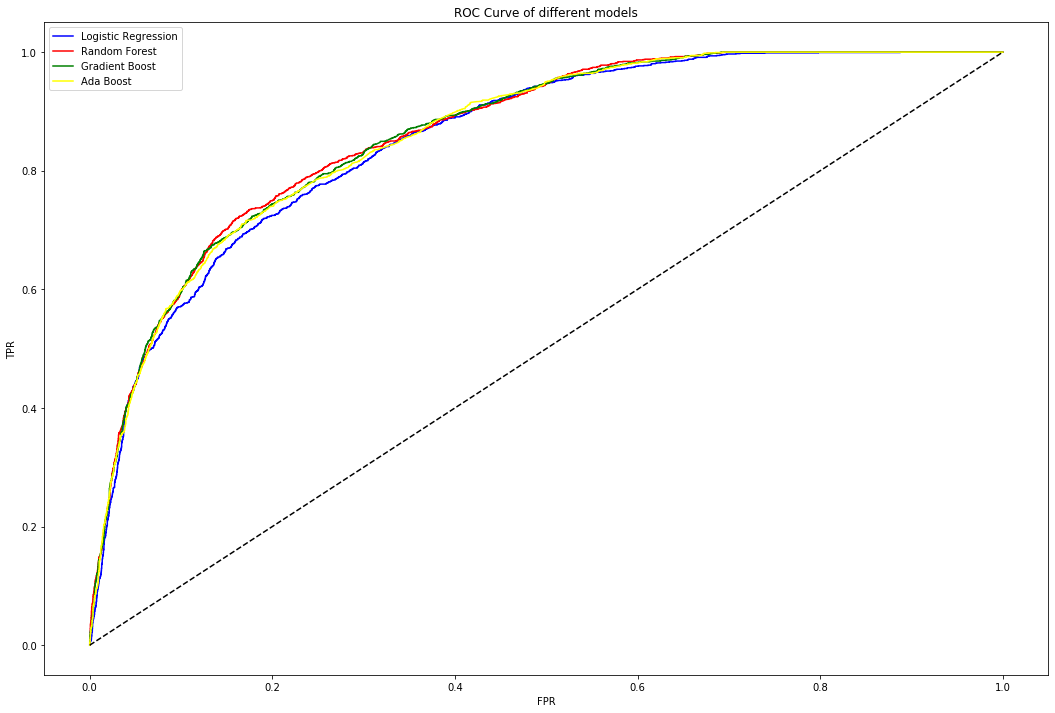

In [72]:
# To plot ROC curve

lr_fpr, lr_tpr, thresholds = roc_curve(y_test,lr_y_pred_proba)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test,rf_y_pred_proba)
gb_fpr, gb_tpr, thresholds = roc_curve(y_test,gb_y_pred_proba)
ada_fpr, ada_tpr, thresholds = roc_curve(y_test,ada_y_pred_proba)

plt.figure(figsize=(18,12))
plt.plot(lr_fpr,lr_tpr,color='blue')
plt.plot(rf_fpr,rf_tpr,color='red')
plt.plot(gb_fpr,gb_tpr,color='green')
plt.plot(ada_fpr,ada_tpr,color='yellow')

plt.plot(fpr,fpr,color='black',linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of different models')
plt.legend(labels=['Logistic Regression','Random Forest','Gradient Boost','Ada Boost'])
plt.show()

From the above ROC Curve of wecan see that all the models are approximately similar but Random Forest has the max AUC Score of 86.32% which is highest among all with a recall of 0.70 and recall is our evaluation metric as it is also known as True Positive Rate. Becasuse predicting default customers is our main concern here.

So, final selected model would be **Random Forest** with a AUC Score of 86.32% and accuracy of 82.12% and highest F1-Score of 0.59 as well among others.